In [1]:
from call_functions import *
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets

On sait que les solution de l'équation des water waves linéarisées (LWWE) sur $\phi$ le potentiel de vitesse à la surface et $\eta$ l'élévation de la surface libre suivante :
$$
\begin{cases}
\partial_t \phi(x,t) &= -g \eta(x,t) \\
\partial_t \eta(x,t) &= G(\phi(x,t))
\end{cases}
$$
Avec $G$ l'opérateur de Fourier : $G:k_n \mapsto |k_n|\tanh(d|k_n|)$, où $d$ la profondeur.
sont données par :
$$
\begin{cases}
\phi(x,t) &= \phi_0 \exp(i(k_n x - \omega_n t)) = \phi_0 \left[ \cos(k_n x - \omega_n t) + i \sin(k_n x -\omega_n t) \right] \\
\eta(x,t) &= \eta_0 \exp(i(k_n x - \omega_n t)) = \eta_0 \left[ \cos(k_n x - \omega_n t) + i \sin(k_n x - \omega_n t) \right]
\end{cases}
$$
sous couvert de la relation : $i\omega_n \phi_0 = g \eta_0$, et avec la relation de dispersion :
$$
\omega_n ^2 = g|k_n|\tanh(d|k_n|)
$$
avec :
- $k_n$ : le nombre d'onde, interprété comme la fréquence d'une onde dans notre cas : $k_n = n\frac{2\pi}{L} = n$ car $L = 2\pi$, étant sur le tore. On écrira donc maintenant $n$ au lieu de $k_n$.
- $\omega_n$ la vitesse angulaire.

Ces solutions sont complexes, si l'on veut des solutions réelles on doit donc avoir, en posant $\theta_n = k_n x - \omega_n t = n x - \omega_n t$ : 
$$
\begin{cases}
\phi(x,t) &= \eta_0 \frac{g}{\omega(n)}\sin(\theta(n)) \\
\eta(x,t) &= \eta_0 \cos(\theta(n))
\end{cases}
$$
Il est possible de férifier que ces fonctions réelles sont bien solutions du système (LWWE). Toute combinaison linéaire de ces fonctions est donc aussi solution de (LWWE). On a donc une solution de la forme :
$$
\eta(x,t) = \eta_0 \sum_{n\in\mathbb{Z}^*} A_n \cos(\theta_n), \quad \phi(x,t) = g \eta_0 \sum_{n\in\mathbb{Z}^*} \frac{A_n}{\omega_n} \cos(\theta_n).
$$
Reste donc à déterminer l'amplitude $A_n$ correspondant à la fréquence $n$. Les amplitudes sont alors déterminées par un spectre JONSWAP défini par :
$$
S(f_n)=\frac{\alpha g^2}{f_n^5} \exp \left[-\beta_1\left(\frac{f_p}{f_n}\right)^4\right] \gamma^r
$$
avec :
- $r = $
- $\beta_1 = 5/4$
- $g= 9.81$

et :
- $f_n = 2\pi \omega_n$
- $S(f_n) = \lim_{\Delta f \rightarrow 0} \frac{1}{\Delta f}\left(\frac{1}{2}A_n^2\right)$

In [2]:
def S(omega,U_10,gamma):
    g = 9.81
    F = 1e5
    alpha = 0.076 * ((U_10**2/(F*g))**(0.22))
    omega_p = 22 * (((g**2)/(U_10*F))**(1/3))
    sigma = 0.07 * (omega <= omega_p) + 0.09 * (omega > omega_p)
    r = np.exp(-((omega - omega_p)**2)/(2 * (sigma**2) * (omega_p**2)))
    Sw = (alpha * (g**2))/(omega**5) * np.exp( - (5/4)*((omega_p/omega)**4))*(gamma**r)
    return Sw

In [3]:
x = np.linspace(0,4,1000)

/var/folders/vb/z01wks0d25n399v1c2rv_r6000mb9z/T/ipykernel_40776/862250434.py:8: RuntimeWarning: divide by zero encountered in divide
  Sw = (alpha * (g**2))/(omega**5) * np.exp( - (5/4)*((omega_p/omega)**4))*(gamma**r)
/var/folders/vb/z01wks0d25n399v1c2rv_r6000mb9z/T/ipykernel_40776/862250434.py:8: RuntimeWarning: invalid value encountered in multiply
  Sw = (alpha * (g**2))/(omega**5) * np.exp( - (5/4)*((omega_p/omega)**4))*(gamma**r)


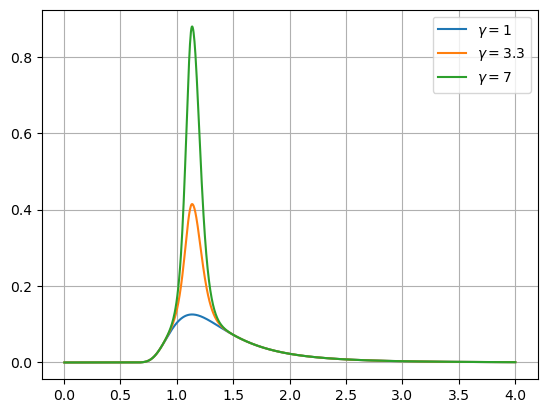

In [4]:
plt.plot(x,S(x,7,1),label=f'$\gamma = 1$')
plt.plot(x,S(x,7,3.3),label=f'$\gamma = 3.3$')
plt.plot(x,S(x,7,7),label=f'$\gamma = 7$')
plt.grid()
plt.legend()
plt.show()

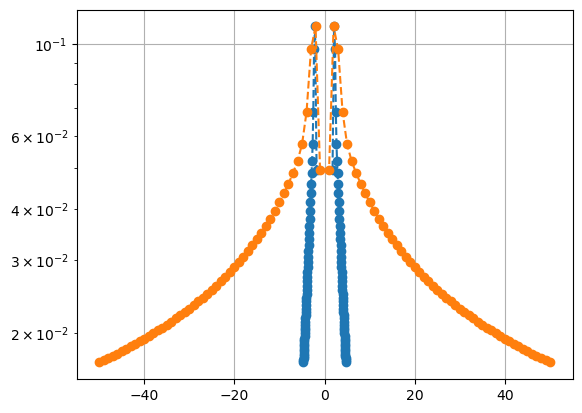

In [5]:
nb_freqs = 50
g = 9.81
h = 10
xi = np.arange(-nb_freqs,nb_freqs+1)
xi = xi[abs(xi)>0]
omega_2 = np.sqrt(g*np.abs(xi))
omega   = np.sign(xi) * np.sqrt(omega_2)
A = np.sqrt(2 * S(abs(omega),1,3.3))
plt.semilogy(omega,A,'o--')
plt.semilogy(xi,A,'o--')
plt.grid()
#print(A)

(100,)


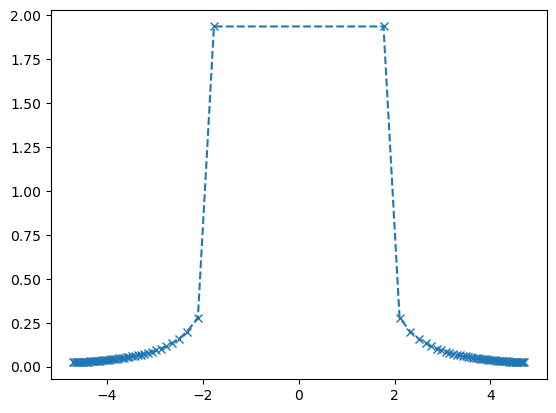

In [6]:
d_omega = np.zeros(100)
for i in range(len(omega)-2):
    d_omega[i+1] = abs(omega[i] - omega[i+2])/2
d_omega[0] = abs(omega[0] - omega[1])
d_omega[-1] = abs(omega[-1] - omega[-2])
plt.plot(omega,d_omega,'x--')
print(S(abs(omega),10,3.3).shape)

def get_d_omega(omega):
    d_omega = np.zeros(len(omega))
    for i in range(len(omega)-2):
        d_omega[i+1] = abs(omega[i] - omega[i+2])/2
    d_omega[0] = abs(omega[0] - omega[1])
    d_omega[-1] = abs(omega[-1] - omega[-2])
    return d_omega

In [7]:
S(omega,7,3.3)

array([-0.00035702, -0.00036612, -0.00037564, -0.00038562, -0.00039609,
       -0.00040708, -0.00041863, -0.00043079, -0.0004436 , -0.00045711,
       -0.00047138, -0.00048647, -0.00050245, -0.0005194 , -0.00053741,
       -0.00055658, -0.00057702, -0.00059884, -0.0006222 , -0.00064725,
       -0.00067418, -0.00070319, -0.00073453, -0.00076848, -0.00080535,
       -0.00084555, -0.0008895 , -0.00093774, -0.0009909 , -0.00104975,
       -0.00111521, -0.00118839, -0.00127069, -0.00136386, -0.00147009,
       -0.00159219, -0.00173385, -0.00189993, -0.00209701, -0.0023342 ,
       -0.00262448, -0.00298688, -0.00345049, -0.00406189, -0.00490029,
       -0.00611128, -0.00799228, -0.01125069, -0.01802863, -0.03857086,
        0.03857086,  0.01802863,  0.01125069,  0.00799228,  0.00611128,
        0.00490029,  0.00406189,  0.00345049,  0.00298688,  0.00262448,
        0.0023342 ,  0.00209701,  0.00189993,  0.00173385,  0.00159219,
        0.00147009,  0.00136386,  0.00127069,  0.00118839,  0.00

In [8]:
def eta(xspace,t,nb_freqs,U_10=7):
    g        = 9.81

    xi = np.arange(-nb_freqs,nb_freqs+1)
    xi = xi[abs(xi)>0]
    omega_2 = np.sqrt(g*np.abs(xi))
    omega   = np.sign(xi) * np.sqrt(omega_2)
    theta  = np.outer(xi,xspace) - np.outer(omega,t)
    d_omega = get_d_omega(omega)
    A = np.sqrt(2 * d_omega * S(abs(omega),U_10,3.3))

    eta_s = (np.sum(omega.reshape((2*nb_freqs,1))*(-g*(A.reshape((2*nb_freqs,1))*np.sin(theta))),0))

    return eta_s

In [9]:
nx = 2**9
n_freqs = 100
U_10 = 1
xspace = np.linspace(0,2*np.pi,nx)[0:nx-1]
widgets_cell = {}
widgets_cell["t"] = widgets.FloatSlider(min=100*np.pi, max=110*np.pi, value=10, description="t")

def plot_solution(**kwargs):
    plt.figure(figsize=(15, 5))
    eta_plot = eta(xspace=xspace,t=kwargs['t'],nb_freqs=n_freqs,U_10=U_10)
    plt.plot(xspace,eta_plot)
    plt.text(1,-50,np.mean(eta_plot),bbox = dict(facecolor = 'red', alpha = 0.5))
    plt.ylim(-80,80)
    plt.xlim(0,2*np.pi)
    plt.grid()
    plt.show()

widgets.interactive(plot_solution, **widgets_cell)

interactive(children=(FloatSlider(value=314.1592653589793, description='t', max=345.57519189487726, min=314.15…

In [197]:
np.linspace(0,2*np.pi,3)[0:2]

array([0.        , 3.14159265])

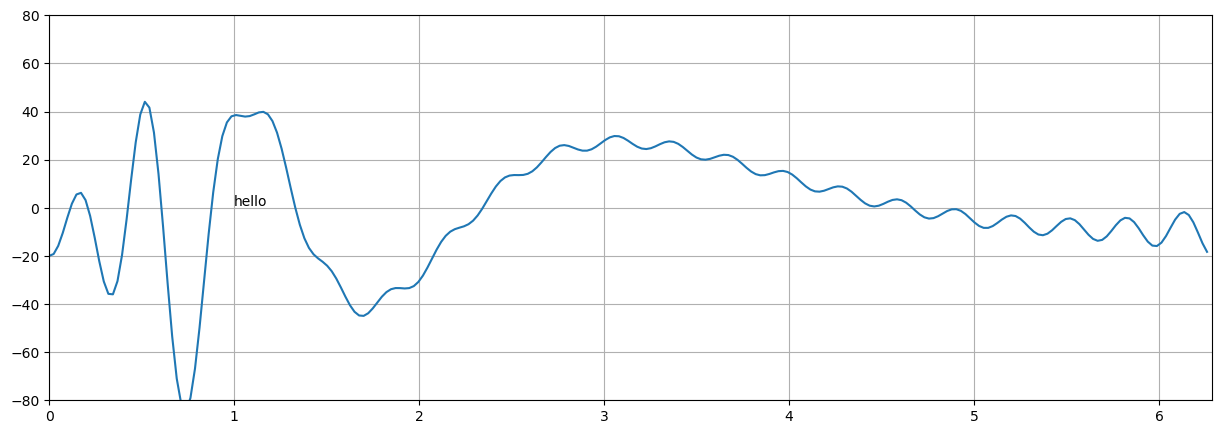

In [261]:
plt.figure(figsize=(15, 5))
plt.text(1,1,'hello')
plt.plot(xspace,eta(xspace=xspace,t=10,nb_freqs=n_freqs,U_10=U_10))
plt.ylim(-80,80)
plt.xlim(0,2*np.pi)
plt.grid()
plt.show()